# **Project 4 Clustering:** Tourism Through a Cluster Lens - Uncovering Global Patterns in GDP Contribution

#### Emily Santacruz Garcia

Before analyzing the data, we need to install the necessary libraries for this project: 

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# **Introduction to the Problem**


Tourism is defined as the act and process of spending time away from home in pursuit of recreation, relaxation, and pleasure while utilizing commercial services. In 2023, travel and tourism contributed nearly 10 trillion US dollars to the global GDP, representing 9.1% of the total (Truyols, 2025). Nonetheless, the economic impact of tourism on a country’s GDP drives up local businesses' demand for services and products, creates jobs, increases revenue, and reduces poverty. Additionally, tourism can significantly benefit developing countries by enhancing their global perception and attracting foreign investment.

This is illustrated in the YouTube video titled “Visiting the Most Crowded Island on Earth (I Can’t Forget What I Saw)” by Ruhi Çenet. In this video, he visits Santa Cruz del Islote, which has an area of just one percent of a square kilometer, where 816 people live. The locals express that tourists are like a blessing from God, as they provide both direct and indirect employment opportunities. This demonstrates that tourism has tremendous effects, from the smallest countries to the largest. 

This project will address several issues by examining the years from 2008 to 2021. The aim is to utilize predictive analytics and the concept of big data while also considering the effects of COVID-19 during 2020 and 2021. It is important to determine which countries will be analyzed based on the available dataset. Although this dataset may not include comprehensive data for every country, it can still offer valuable insights. The primary focus will be on a crucial aspect of economic analysis: examining how tourism contributes to GDP and how countries are grouped based on their tourism patterns. Clustering techniques will be employed to categorize countries according to various tourism indicators, providing insights for policymakers and industry stakeholders. Additionally, the impacts of the pandemic on tourism seasonality and economic trends will be compared. Acknowledging the limitations of workforce data, the focus will be on what encourages individuals to visit a specific destination, with the provided variables discussed in more detail below.

In [7]:
# Read data into a dataframe: 'merged_tourism.csv'

merged_tourism = pd.read_csv('merged_tourism.csv')

In [8]:
# Changed 'merged_tourism' columns names for 'tourism_share_gdp' to 'Share GDP', 'in_tour_arrivals_ovn_vis_tourists' to 'Inbound Arrivals', 'business_personal_ratio' to 'Business-Personal Ratio'

merged_tourism.rename(columns={'tourism_share_gdp': 'Share GDP', 'in_tour_arrivals_ovn_vis_tourists': 'Inbound Arrivals', 'business_personal_ratio': 'Business-Personal'}, inplace=True)
merged_tourism

Entity  Year  Share GDP  Inbound Arrivals  Business-Personal
0    Albania  2008   2.757073         1247000.0           0.058955
1    Albania  2009   2.668689         1711000.0           0.028825
2    Albania  2010   2.812342         2191000.0           0.019831
3    Albania  2011   2.534773         2469000.0           0.014884
4    Albania  2012   2.356966         3156000.0           0.012097
..       ...   ...        ...               ...                ...
638  Uruguay  2017   8.500000         3674000.0           0.065889
639  Uruguay  2018   8.100000         3469000.0           0.068419
640  Uruguay  2019   7.000000         3059000.0           0.073641
641  Vietnam  2013   6.060000         7201000.0           0.200952
642  Vietnam  2014   6.140000         7488000.0           0.201770

[643 rows x 5 columns]

In [9]:
merged_tourism['Entity'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Aruba',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Belarus', 'Belgium',
       'Bermuda', 'Bhutan', 'Botswana', 'Brunei', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Denmark', 'Egypt', 'El Salvador',
       'Eswatini', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Guam', 'Guinea', 'Guyana', 'Honduras', 'Hong Kong', 'Hungary',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Jamaica',
       'Jordan', 'Kazakhstan', 'Kiribati', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Marshall Islands',
       'Martinique', 'Mauritius', 'Mexico', 'Micronesia (country)',
       'Mongolia', 'Montserrat', 'Morocco', 'Mozambique', 'Namibia',
       'Nepal', 'New Zealand', 'Nigeria', 'Norway', 'Oman', 'Palau',
       'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Reunion',
       'Rwanda', 'Saint Lucia', 'Saudi Arabia', 'Sierra Leone',
       'Singapore', 'Slovenia', 'South Africa

In [10]:
# Read data into a dataframe: 'merged_tourism_localvforeign.csv'

merged_tourismLF = pd.read_csv('merged_tourism_localvforeign.csv')

In [11]:
# Changed 'merged_tourismLF' columns names for 'tourism_share_gdp' to 'Share GDP', 'in_tour_arrivals_ovn_vis_tourists' to 'Inbound Arrivals', 'business_personal_ratio' to 'Business-Personal'
# 'dom_tour_accom_hotels_and_similar_estab_guests' to 'Domestic tourists', 'in_tour_accom_hotels_and_similar_estab_guests' to 'Foreign guests'

merged_tourismLF.rename(columns={'tourism_share_gdp': 'Share GDP', 'in_tour_arrivals_ovn_vis_tourists': 'Inbound Arrivals', 'business_personal_ratio': 'Business-Personal', 'dom_tour_accom_hotels_and_similar_estab_guests': 'Domestic tourists', 'in_tour_accom_hotels_and_similar_estab_guests': 'Foreign guests'}, inplace=True)
merged_tourismLF

Entity  Year  Share GDP  Inbound Arrivals  Business-Personal  \
0           Albania  2008   2.757073         1247000.0           0.058955   
1           Albania  2009   2.668689         1711000.0           0.028825   
2           Albania  2010   2.812342         2191000.0           0.019831   
3           Albania  2011   2.534773         2469000.0           0.014884   
4           Albania  2012   2.356966         3156000.0           0.012097   
..              ...   ...        ...               ...                ...   
229  United Kingdom  2015   3.937450        35149000.0           0.353145   
230  United Kingdom  2016   3.446720        37358000.0           0.344177   
231  United Kingdom  2017   3.423722        39543000.0           0.303589   
232  United Kingdom  2018   3.238154        38664000.0           0.302712   
233  United Kingdom  2019   3.649353        39418000.0           0.293434   

     Domestic tourists  Foreign guests  
0             156000.0         57000.0  
1             171000.0         65000.0  
2             181000.0         74000.0  
3             182000.0        136000.0  
4             101000.0        149000.0  
..                 ...             ...  
229         41820000.0      18937000.0  
230         42490000.0      19792000.0  
231         42510000.0      21833000.0  
232         42040000.0      21704000.0  
233         43490000.0      21697000.0  

[234 rows x 7 columns]

In [12]:
merged_tourismLF['Entity'].unique()

array(['Albania', 'Argentina', 'Azerbaijan', 'Bahrain', 'Belarus',
       'Belgium', 'Chile', 'Denmark', 'Eswatini', 'Finland', 'France',
       'Hungary', 'Indonesia', 'Israel', 'Italy', 'Jordan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mexico',
       'Morocco', 'Mozambique', 'Norway', 'Peru', 'Poland',
       'Saudi Arabia', 'Slovenia', 'Spain', 'Sweden', 'Thailand',
       'United Arab Emirates', 'United Kingdom'], dtype=object)

In [13]:
# Read data into a dataframe: 'merged_tourism_inboundvoutbound.csv'

merged_tourismIO = pd.read_csv('merged_tourism_inboundvoutbound.csv')

In [14]:
# Changed 'merged_tourismLF' columns names for 'tourism_share_gdp' to 'Share GDP', 'in_tour_arrivals_ovn_vis_tourists' to 'Inbound Arrivals', 'business_personal_ratio' to 'Business-Personal'
# 'inbound_outbound_tourism' to 'Inbound-Outbound'

merged_tourismIO.rename(columns={'tourism_share_gdp': 'Share GDP', 'in_tour_arrivals_ovn_vis_tourists': 'Inbound Arrivals', 'business_personal_ratio': 'Business-Personal', 'inbound_outbound_tourism': 'Inbound-Outbound'}, inplace=True)
merged_tourismIO

Entity  Year  Share GDP  Inbound Arrivals  Business-Personal  \
0    Argentina  2016   1.917674         6668000.0           0.259773   
1    Argentina  2017   1.986258         6711000.0           0.298891   
2    Argentina  2018   1.839787         6942000.0           0.328241   
3    Argentina  2019   1.773273         7399000.0           0.252144   
4    Argentina  2020   0.883223         2090000.0           0.132143   
..         ...   ...        ...               ...                ...   
366    Uruguay  2015   6.500000         2773000.0           0.080539   
367    Uruguay  2016   7.300000         3037000.0           0.076592   
368    Uruguay  2017   8.500000         3674000.0           0.065889   
369    Uruguay  2018   8.100000         3469000.0           0.068419   
370    Uruguay  2019   7.000000         3059000.0           0.073641   

     Inbound-Outbound  
0            0.640108  
1            0.549496  
2            0.623720  
3            0.811828  
4            0.735656  
..                ...  
366          1.250789  
367          1.770846  
368          2.053661  
369          1.781716  
370          1.391087  

[371 rows x 6 columns]

In [15]:
merged_tourismIO['Entity'].unique()

array(['Argentina', 'Azerbaijan', 'Bahrain', 'Belarus', 'Belgium',
       'Bermuda', 'Bhutan', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Denmark', 'El Salvador', 'Eswatini', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Honduras', 'Hungary', 'India', 'Israel',
       'Italy', 'Jordan', 'Kazakhstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malawi', 'Malta', 'Mauritius', 'Mexico', 'Morocco',
       'Nepal', 'New Zealand', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Saudi Arabia', 'Sierra Leone',
       'Singapore', 'Slovenia', 'Spain', 'Sri Lanka', 'Sweden',
       'Thailand', 'Uganda', 'United Arab Emirates', 'United States',
       'Uruguay'], dtype=object)

The primary research question for this study is: **"How do countries group based on tourism’s impact on GDP, taking into account the balance between domestic and international tourism, as well as inbound and outbound travel patterns?"**

To address this, several sub-questions will be explored using different datasets:

**Merged Tourism Dataset:**
1. What clusters emerge among countries with similar levels of tourism-related GDP dependency?

**Inbound vs. Outbound Tourism Dataset:**
1. How do countries group based on the balance between inbound and outbound tourism?

**Impact of COVID-19 on Tourism Clusters:**
1. How did the COVID-19 pandemic (2020-2021) impact tourism-related GDP clusters?
2. How do tourism clusters from 2008-2019 compare to those from 2020-2021?

By applying clustering methods, this study aims to uncover patterns in global tourism dependency, providing insights for policymakers and industry stakeholders.

# **What is Clustering, and How Does it Work?**

Clustering algorithms serve as unsupervised learning techniques designed to identify patterns and similarities within datasets. This allows for the classification of data exhibiting similar traits into distinct target groups. While these algorithms are effective for pinpointing correlations among different data classes, their performance can be hindered by issues such as non-linear relationships, noise, high dimensionality, and variability that typically arise in real-world data.

The primary objective of clustering is to aggregate similar data points into cohesive groups, maximizing the similarity among members within each cluster while minimizing that between different clusters. One of the widely used approaches for clustering is k-means clustering, which effectively organizes data into groups based on their similarities. In the k-means algorithm, the process begins with the random selection of a centroid, which serves as a central reference point. Each data point is then assigned to the nearest centroid, thereby forming clusters. This assignment continues iteratively until the positions of the centroids stabilize. The goal is to ensure that data points deemed similar are grouped. The 'K' in k-means indicates the pre-defined number of clusters intended for organization. After sorting the items into k groups, the method utilizes Euclidean distance to measure similarity. The algorithm initializes k centroids at random and assigns each data point to the nearest one. It then recalculates the mean position of the points in each cluster to update the centroid, repeating this process for a specified number of iterations. The outcome is a collection of well-defined clusters. K-means is particularly valuable for unsupervised machine learning applications, especially when handling unlabeled datasets.

Another methodology is agglomerative clustering, which adopts a bottom-up strategy. In this framework, each data point is initially regarded as an individual cluster. The algorithm progressively merges the most similar pairs of clusters until a single unified cluster contains all data points. It processes each cluster as an individual point, assesses the similarity distances between all pairs, and combines the two most alike clusters. This can be done using Euclidean distance or the Manhattan distance, which sums the absolute differences of points' coordinates in a grid-like layout. This process continues until all points converge into one cluster. 

In summary, various clustering techniques can effectively be employed to analyze unsupervised data, facilitating valuable insights into complex datasets. 


# **Introduce the Data**

The data was sourced from the *[Our World in Data website](https://ourworldindata.org/tourism?utm_source=chatgpt.com)*. There was an opportunity to merge and clean the data. Using variables from the datasets, the focus was on the following: ‘[Share of GDP from tourism](https://ourworldindata.org/grapher/tourism-gdp-proportion-of-total-gdp),’ ‘[International tourist trips](https://ourworldindata.org/grapher/international-tourist-trips),’ ‘[Ratio of business trips to personal trips](https://ourworldindata.org/grapher/ratio-of-business-trips-to-trips-for-personal-reasons),’ ‘[Global aviation fatalities per million passengers](https://ourworldindata.org/grapher/aviation-fatalities-per-million-passengers),’ ‘[Local versus foreign guests in hotels and similar establishments for 2022](https://ourworldindata.org/grapher/domestic-guests-in-tourism-accommodation-hotels-and-similar-establishments-vs-foreign-guests-in-tourism-accommodation-hotels-and-similar-establishments),’ and the ‘[Ratio of inbound to outbound tourist trips](https://ourworldindata.org/grapher/ratio-of-inbound-to-outbound-tourists).’ The data examines tourism and various factors influencing it in specific countries, with a primary focus on the share of GDP derived from tourism.

This process allowed for the creation of three distinct datasets, all of which aligned by year and region, with no missing values: 
1. Merged Tourism: 644 rows and 5 columns
2. Merged Tourism Local vs. Foreign: 235 rows and 7 columns
3. Merged Tourism Inbound vs. Outbound: 371 rows and 6 columns 

The data and the meanings of the features will be discussed for each dataset below:

#### **Merged Tourism Dataset (2008-2021):**
- **Entity:** Countries names
- **Year:** Year
- **tourism_share_gdp (Share GDP):** Share GDP for tourism
- **in_tour_arrivals_ovn_vis_tourists (Inbound Arrivals):** Inbound international tourist arrivals
- **business_personal_ratio (Business-Personal):** Ratio of business trips to personal trips. A ratio close to 1 indicates a higher number of business arrivals.

#### **Countries Under Review for This Dataset (Merged Tourism):**  

**A - C:** Albania, Antigua and Barbuda, Argentina, Aruba, Azerbaijan, Bahamas, Bahrain, Belarus, Belgium, Bermuda, Bhutan, Botswana, Brunei, Canada, Chile, Colombia, Costa Rica.  

**D - H:** Denmark, Egypt, El Salvador, Eswatini, Fiji, Finland, France, French Polynesia, Guam, Guinea, Guyana, Honduras, Hong Kong, Hungary.  

**I - M:** India, Indonesia, Ireland, Israel, Italy, Jamaica, Jordan, Kazakhstan, Kiribati, Latvia, Lithuania, Luxembourg, Malawi, Malaysia, Malta, Marshall Islands, Martinique, Mauritius, Mexico.  

**M - P:** Micronesia (country), Mongolia, Montserrat, Morocco, Mozambique, Namibia, Nepal, New Zealand, Nigeria, Norway, Oman, Palau, Panama, Paraguay, Peru, Philippines, Poland.  

**R - U:** Réunion, Rwanda, Saint Lucia, Saudi Arabia, Sierra Leone, Singapore, Slovenia, South Africa, Spain, Sri Lanka, Sweden, Thailand, Uganda, United Arab Emirates, United Kingdom, United States, Uruguay, Vietnam.  


#### **Merged Tourism: Local vs. Foreign Dataset (2008-2021):**
- **Entity:** Countries names
- **Year:** Year
- **tourism_share_gdp (Share GDP):** Share GDP for tourism
- **in_tour_arrivals_ovn_vis_tourists (Inbound Arrivals):** Inbound international tourist arrivals
- **business_personal_ratio (Business-Personal):** Ratio of business trips to personal trips. A ratio close to 1 indicates a higher number of business arrivals.
- **dom_tour_accom_hotels_and_similar_estab_guests (Domestic tourists):** Domestic tourists staying in hotels and similar establishments
- **in_tour_accom_hotels_and_similar_estab_guests (Foreign guests):** Foreign guests in hotels and similar establishments


#### **Countries Under Review for This Dataset (Merged Tourism: Local vs. Foreign):**  

**A - C:** Albania, Argentina, Azerbaijan, Bahrain, Belarus, Belgium, Chile.  

**D - F:** Denmark, Eswatini, Finland, France.  

**G - H:** Hungary.  

**I - K:** Indonesia, Israel, Italy, Jordan.  

**L - N:** Latvia, Lithuania, Luxembourg, Malaysia, Malta, Mexico, Morocco, Mozambique, Norway.  

**O - P:** Peru, Poland.  

**Q - S:** Saudi Arabia, Slovenia, Spain.  

**T - Z:** Sweden, Thailand, United Arab Emirates, United Kingdom.  


#### **Merged Tourism: Inbound vs. Outbound Dataset (2008-2021):**
- **Entity:** Countries names
- **Year:** Year
- **tourism_share_gdp(Share GDP):** Share GDP for tourism
- **in_tour_arrivals_ovn_vis_tourists(Inbound Arrivals):** Inbound international tourist arrivals
- **business_personal_ratio (Business-Personal):** Ratio of business trips to personal trips. A ratio close to 1 indicates a higher number of business arrivals.
- **inbound_outbound_tourism (Inbound-Outbound):** Ratio of inbound to outbound tourist trips

#### **Countries Under Review for This Dataset (Merged Tourism: Inbound vs. Outbound):**  

**A - C:** Argentina, Azerbaijan, Bahrain, Belarus, Belgium, Bermuda, Bhutan, Canada, Chile, Colombia, Costa Rica.  

**D - F:** Denmark, El Salvador, Eswatini, Fiji, Finland, France, French Polynesia.  

**G - H:** Honduras, Hungary.  

**I - K:** India, Israel, Italy, Jordan, Kazakhstan.  

**L - N:** Latvia, Lithuania, Luxembourg, Malawi, Malta, Mauritius, Mexico, Morocco, Nepal, New Zealand, Norway.  

**O - P:** Oman, Panama, Paraguay, Peru, Philippines, Poland.  

**Q - S:** Saudi Arabia, Sierra Leone, Singapore, Slovenia, Spain, Sri Lanka, Sweden.  

**T - Z:** Thailand, Uganda, United Arab Emirates, United States, Uruguay.  


# **Data Understanding/Visualization**

In [28]:
# merged_tourism shape
print(f"The merged_tourism dataset has {merged_tourism.shape[0]} rows and {merged_tourism.shape[1]} columns.")

# merged_tourismLF
print(f"The merged_tourismLF dataset has {merged_tourismLF.shape[0]} rows and {merged_tourismLF.shape[1]} columns.")

#merged_tourisoIO
print(f"The merged_tourismIO dataset has {merged_tourismIO.shape[0]} rows and {merged_tourismIO.shape[1]} columns.")

The merged_tourism dataset has 643 rows and 5 columns.
The merged_tourismLF dataset has 234 rows and 7 columns.
The merged_tourismIO dataset has 371 rows and 6 columns.


In [29]:
# merged_tourism description
merged_tourism.describe()

Year   Share GDP  Inbound Arrivals  Business-Personal
count   643.000000  643.000000      6.430000e+02         643.000000
mean   2014.533437    4.427443      6.877075e+06           0.225166
std       3.753717    3.914314      1.252554e+07           0.322217
min    2008.000000   -0.100000      1.600000e+03           0.009049
25%    2011.000000    2.095105      6.600000e+05           0.061799
50%    2015.000000    3.238154      2.080000e+06           0.147796
75%    2018.000000    5.600000      7.408000e+06           0.265800
max    2021.000000   30.000000      9.091400e+07           4.076923

In [30]:
# merged_tourismLF description
merged_tourismLF.describe()

Year   Share GDP  Inbound Arrivals  Business-Personal  \
count   234.000000  234.000000      2.340000e+02         234.000000   
mean   2014.769231    3.704931      1.184421e+07           0.174563   
std       3.864407    2.033248      1.582227e+07           0.168655   
min    2008.000000    0.690216      1.703000e+05           0.010295   
25%    2011.000000    2.343264      2.400000e+06           0.048230   
50%    2015.000000    3.227866      4.865000e+06           0.129556   
75%    2018.000000    4.781707      1.338450e+07           0.287611   
max    2021.000000    9.154534      9.091400e+07           1.699774   

       Domestic tourists  Foreign guests  
count       2.340000e+02    2.340000e+02  
mean        1.672148e+07    7.719913e+06  
std         2.300323e+07    1.216569e+07  
min         4.800000e+04    3.400000e+04  
25%         6.485000e+05    1.209750e+06  
50%         4.710500e+06    3.227500e+06  
75%         3.502925e+07    7.328000e+06  
max         1.078640e+08    6.125000e+07

In [31]:
# merged_tourismIO description
merged_tourismIO.describe()

Year   Share GDP  Inbound Arrivals  Business-Personal  \
count   371.000000  371.000000      3.710000e+02         371.000000   
mean   2014.563342    4.060410      8.544783e+06           0.179315   
std       3.835560    2.678303      1.457206e+07           0.141057   
min    2008.000000   -0.100000      2.400000e+04           0.018334   
25%    2011.000000    2.089153      1.340000e+06           0.073249   
50%    2015.000000    3.100000      2.927000e+06           0.145894   
75%    2018.000000    5.800000      9.315000e+06           0.240282   
max    2021.000000   13.500000      9.091400e+07           0.757194   

       Inbound-Outbound  
count        371.000000  
mean           1.763662  
std            1.552501  
min            0.259563  
25%            0.732487  
50%            1.259950  
75%            2.092894  
max           15.484848

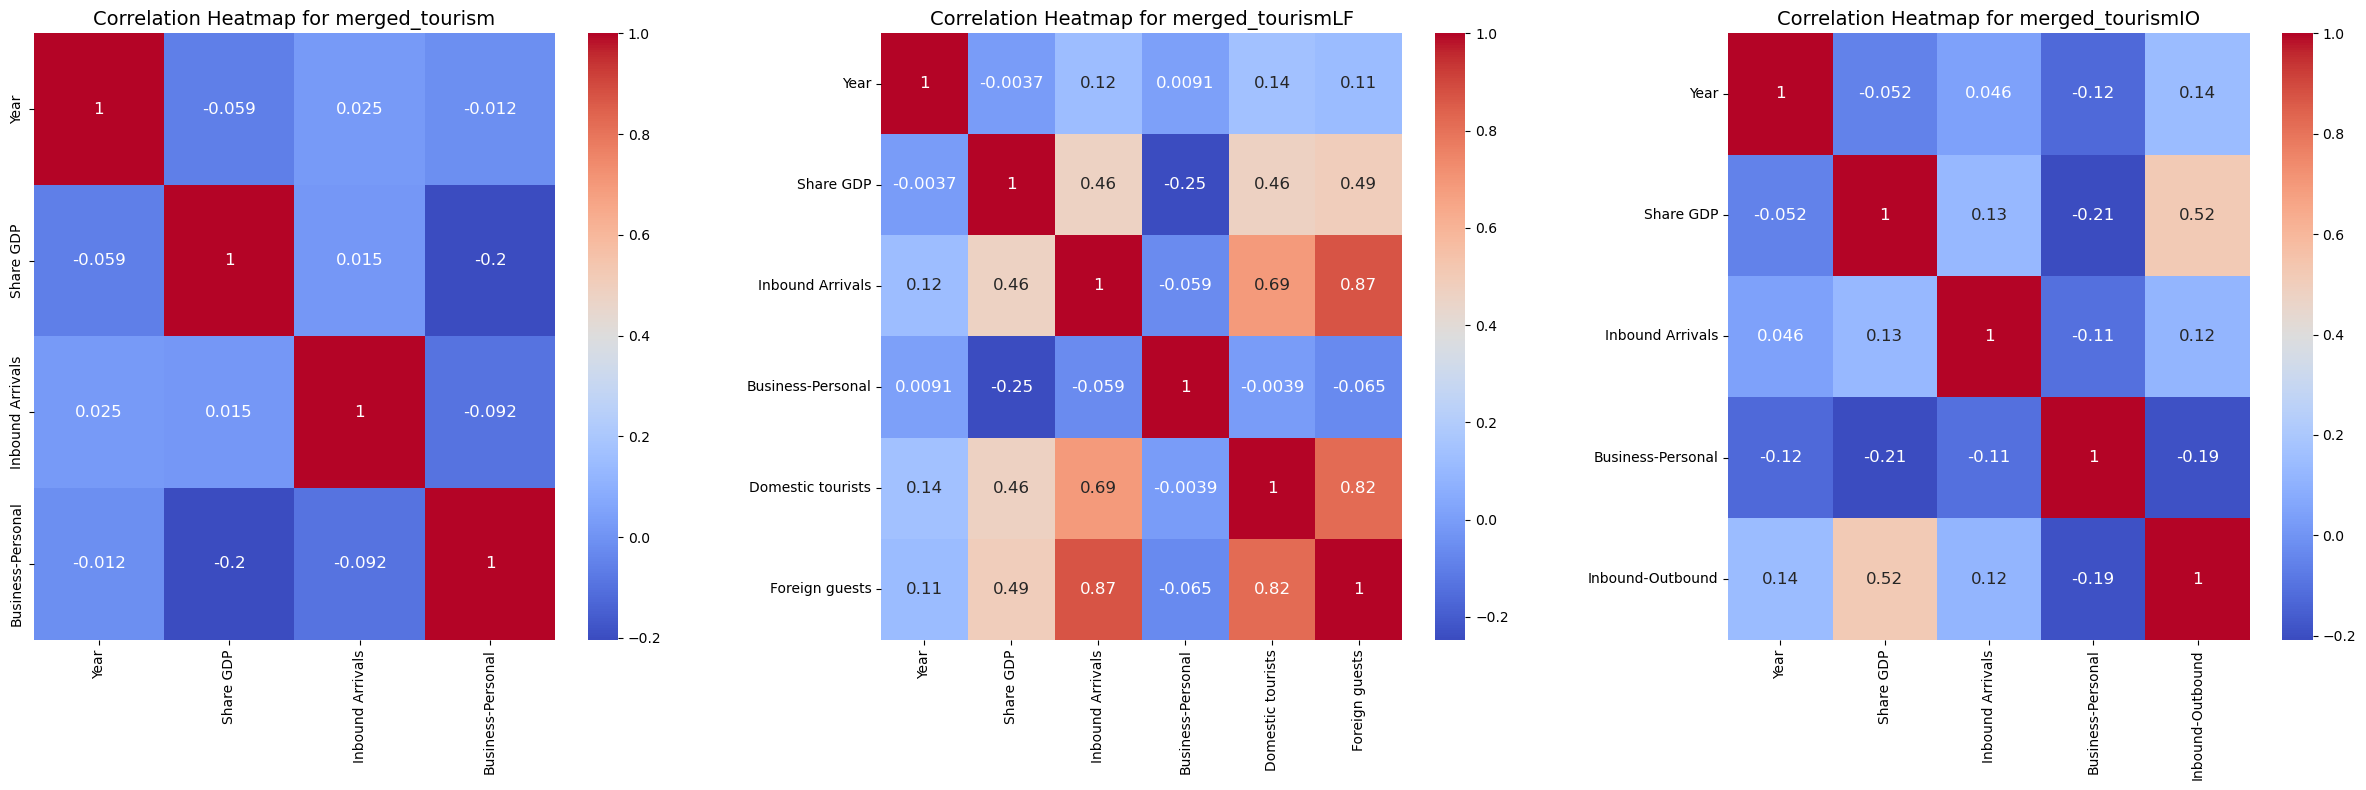

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axs = plt.subplots(1, 3, figsize=(24, 8))  # Increased figure size

# Heatmap/Correlation for merged_tourism
numerical_features = merged_tourism.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', ax=axs[0], annot_kws={"size": 12})  # Increased font size
axs[0].set_title('Correlation Heatmap for merged_tourism', fontsize=14)  # Increased title font size

# Heatmap/Correlation for merged_tourismLF
numerical_featuresLF = merged_tourismLF.select_dtypes(include=np.number)
sns.heatmap(numerical_featuresLF.corr(), annot=True, cmap='coolwarm', ax=axs[1], annot_kws={"size": 12})
axs[1].set_title('Correlation Heatmap for merged_tourismLF', fontsize=14)

# Heatmap/Correlation for merged_tourismIO
numerical_featuresIO = merged_tourismIO.select_dtypes(include=np.number)
sns.heatmap(numerical_featuresIO.corr(), annot=True, cmap='coolwarm', ax=axs[2], annot_kws={"size": 12})
axs[2].set_title('Correlation Heatmap for merged_tourismIO', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Increased spacing between subplots
plt.show()

Analyzing the heat map correlations for the datasets reveals relationships between variables such as Share of GDP, Inbound Arrivals, Business vs. Personal Travel, and Domestic vs. Foreign Tourism. Strong correlations, such as those between Inbound Arrivals and Foreign Guests in the merged_tourismLF dataset, suggest potential redundancy, which could impact clustering results. Highly correlated variables may lead to redundancy, making Principal Component Analysis (PCA) useful for dimensionality reduction before clustering. Conversely, variables with low correlations might provide unique insights, indicating they should be retained.

In the merged_tourismIO dataset, Inbound vs. Outbound Tourism shows a moderate correlation with Share of GDP, suggesting that some countries' economies rely more on outbound tourism than inbound tourism. Additionally, Business vs. Personal Travel appears to be negatively correlated with Share of GDP in certain instances. This could imply that leisure travel contributes more to GDP than business travel in specific regions. Given these observations, the modeling process suggests utilizing PCA during preprocessing, potentially removing highly correlated variables to avoid redundancy.

In [34]:
import plotly.express as px

# Creating a Bubble chart to explore 'Tourism Share of GDP vs. Year (Inbound Arrivals)
fig_mergedtourism = px.scatter(merged_tourism, 
                 x="Year", 
                 y="Share GDP", 
                 size="Inbound Arrivals", 
                 color="Entity",
                 hover_name="Entity", 
                 title="Tourism Share of GDP vs. Year (Bubble Size: Inbound Arrivals)",
                 labels={"Share GDP": "Tourism Share of GDP (%)", "Inbound Arrivals": "Inbound Tourist Arrivals"},
                 animation_frame="Year",
                 range_x=[merged_tourism['Year'].min() - 1, merged_tourism['Year'].max() + 1],
                 range_y=[merged_tourism['Share GDP'].min() - 1, merged_tourism['Share GDP'].max() + 1]
                )

fig_mergedtourism.update_layout(
    title_font=dict(size=20),
    xaxis_title_font=dict(size=16),
    yaxis_title_font=dict(size=16),
    legend_title_font=dict(size=16),
    legend=dict(itemsizing='constant') 
)

fig_mergedtourism.update_traces(marker=dict(sizeref=0.1))  # Make bubbles bigger

# To look at the visualization play the start button
fig_mergedtourism.show()

Analyzing the tourism share of GDP from 2008 to 2021 for the countries in the dataset, we can see that countries with a significant tourism GDP share and a high number of inbound arrivals will have larger bubbles in visual representations. Conversely, countries that rely more on domestic tourism may have smaller bubbles, even if they contribute significantly to GDP. In 2008, the United States had the highest tourism share of GDP at 2.8%. By 2019, France, Italy, and French Polynesia recorded the highest shares, making 2019 the peak year overall. Economic shocks, such as COVID-19, are evident in the shrinking bubbles observed in the years 2020 and 2021.

In [36]:
import plotly.express as px

# Calculate the ratio of domestic to foreign tourists
merged_tourismLF['Domestic/Foreign Ratio'] = merged_tourismLF['Domestic tourists'] / merged_tourismLF['Foreign guests']

# Creating a Bubble chart to explore 
fig_mergedtourismLF = px.scatter(merged_tourismLF,
                    x="Year",
                    y="Share GDP",
                    size="Domestic/Foreign Ratio",
                    color="Entity",
                    hover_name="Entity",
                    title="Tourism Share of GDP vs. Year (Bubble Size: Domestic/Foreign Tourists)",
                    labels={"Share GDP": "Tourism Share of GDP (%)", "Domestic/Foreign tourists": "Domestic-Foreign Tourist Arrivals"},
                    animation_frame="Year",
                    range_x=[merged_tourismLF['Year'].min() - 1, merged_tourismLF['Year'].max() + 1],
                    range_y=[merged_tourismLF['Share GDP'].min() - 1, merged_tourismLF['Share GDP'].max() + 1]
                   )

fig_mergedtourismLF.update_layout(
    title_font=dict(size=20),
    xaxis_title_font=dict(size=16),
    yaxis_title_font=dict(size=16),
    legend_title_font=dict(size=16),
    legend=dict(itemsizing='constant')
)

fig_mergedtourismLF.update_traces(marker=dict(sizeref=0.1))  # Make bubbles bigger

# To look at the visualization play the start button
fig_mergedtourismLF.show()

Examining the relationship between tourism's share of GDP and the ratio of domestic to foreign tourists reveals important insights. A high ratio indicates countries that rely heavily on domestic tourism, while a low ratio points to those that depend more on foreign travelers. From 2008 to 2019, the tourism share of GDP was relatively moderate, ranging from 2% to 4%. However, in 2020 and 2021, this share dropped below 2%. While some countries were able to maintain a moderate share, others, like Argentina, were significantly affected.

In [38]:
import plotly.express as px

# Creating a Bubble chart to explore 'Tourism Share of GDP vs. Year (Inbound-Outbound Ratio)'
fig_mergedtourismIO = px.scatter(merged_tourismIO, 
                 x="Year", 
                 y="Share GDP", 
                 size="Inbound-Outbound", 
                 color="Entity",
                 hover_name="Entity", 
                 title="Tourism Share of GDP vs. Year (Bubble Size: Inbound-Outbound Ratio)",
                 labels={"Share GDP": "Tourism Share of GDP (%)", "Inbound-Outbound": "Inbound-Outbound Ratio"},
                 animation_frame="Year",
                 range_x=[merged_tourismIO['Year'].min() - 1, merged_tourismIO['Year'].max() + 1],
                 range_y=[merged_tourismIO['Share GDP'].min() - 1, merged_tourismIO['Share GDP'].max() + 1]
                )

fig_mergedtourismIO.update_layout(
    title_font=dict(size=20),
    xaxis_title_font=dict(size=16),
    yaxis_title_font=dict(size=16),
    legend_title_font=dict(size=16),
    legend=dict(itemsizing='constant') 
)

fig_mergedtourismIO.update_traces(marker=dict(sizeref=0.1))  # Make bubbles bigger

# To look at the visualization play the start button
fig_mergedtourismIO.show()

Analyzing the share of tourism in GDP over the years reveals some interesting trends. Countries with a high ratio of inbound tourism are typically those that are dominated by inbound visitors, while nations with a low ratio are often characterized by heavy outbound travel, where residents travel more than they receive tourists. Similar to the previous dataset, the tourism share remained moderate until around 2020-2021. This helps provide a general idea of the direction in which the projects are leaning.

<Figure size 800x600 with 0 Axes>

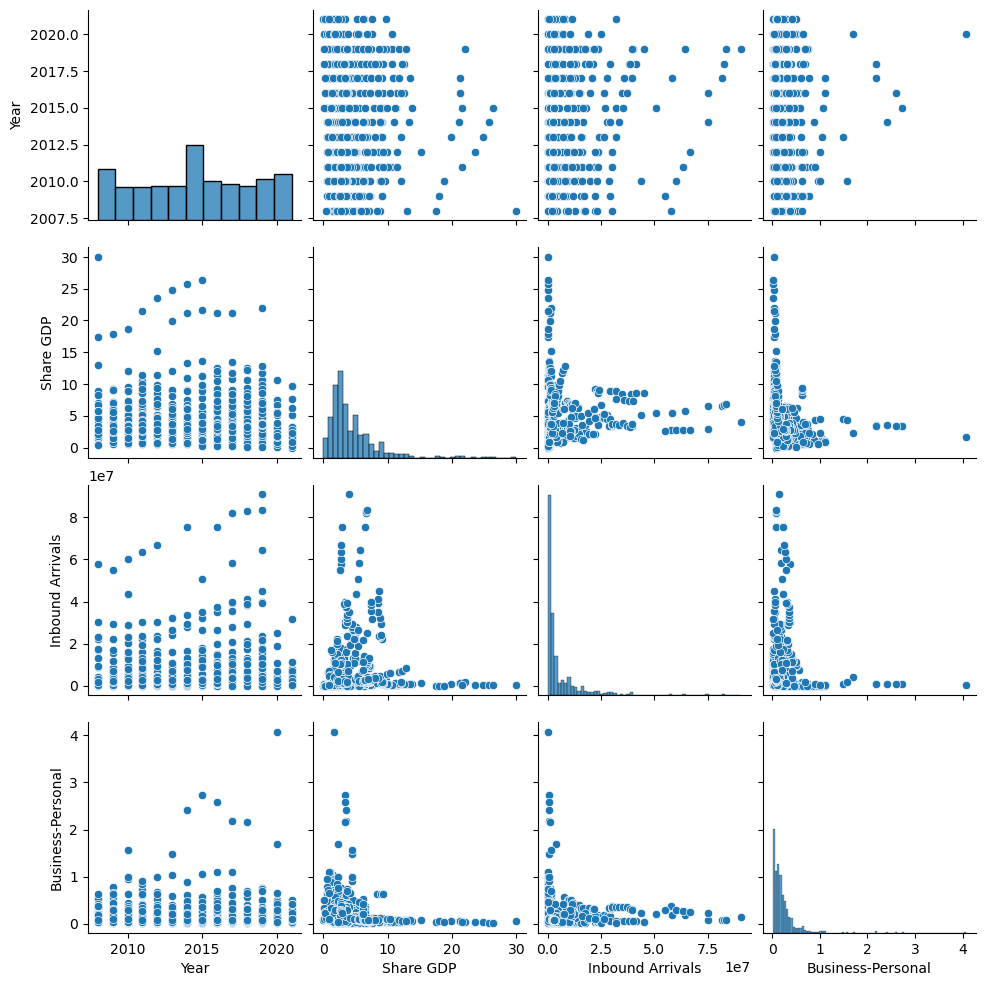

In [40]:
# sns pairplot for merged_tourism
plt.figure(figsize=(8, 6))
sns.pairplot(merged_tourism)
plt.show()

<Figure size 800x600 with 0 Axes>

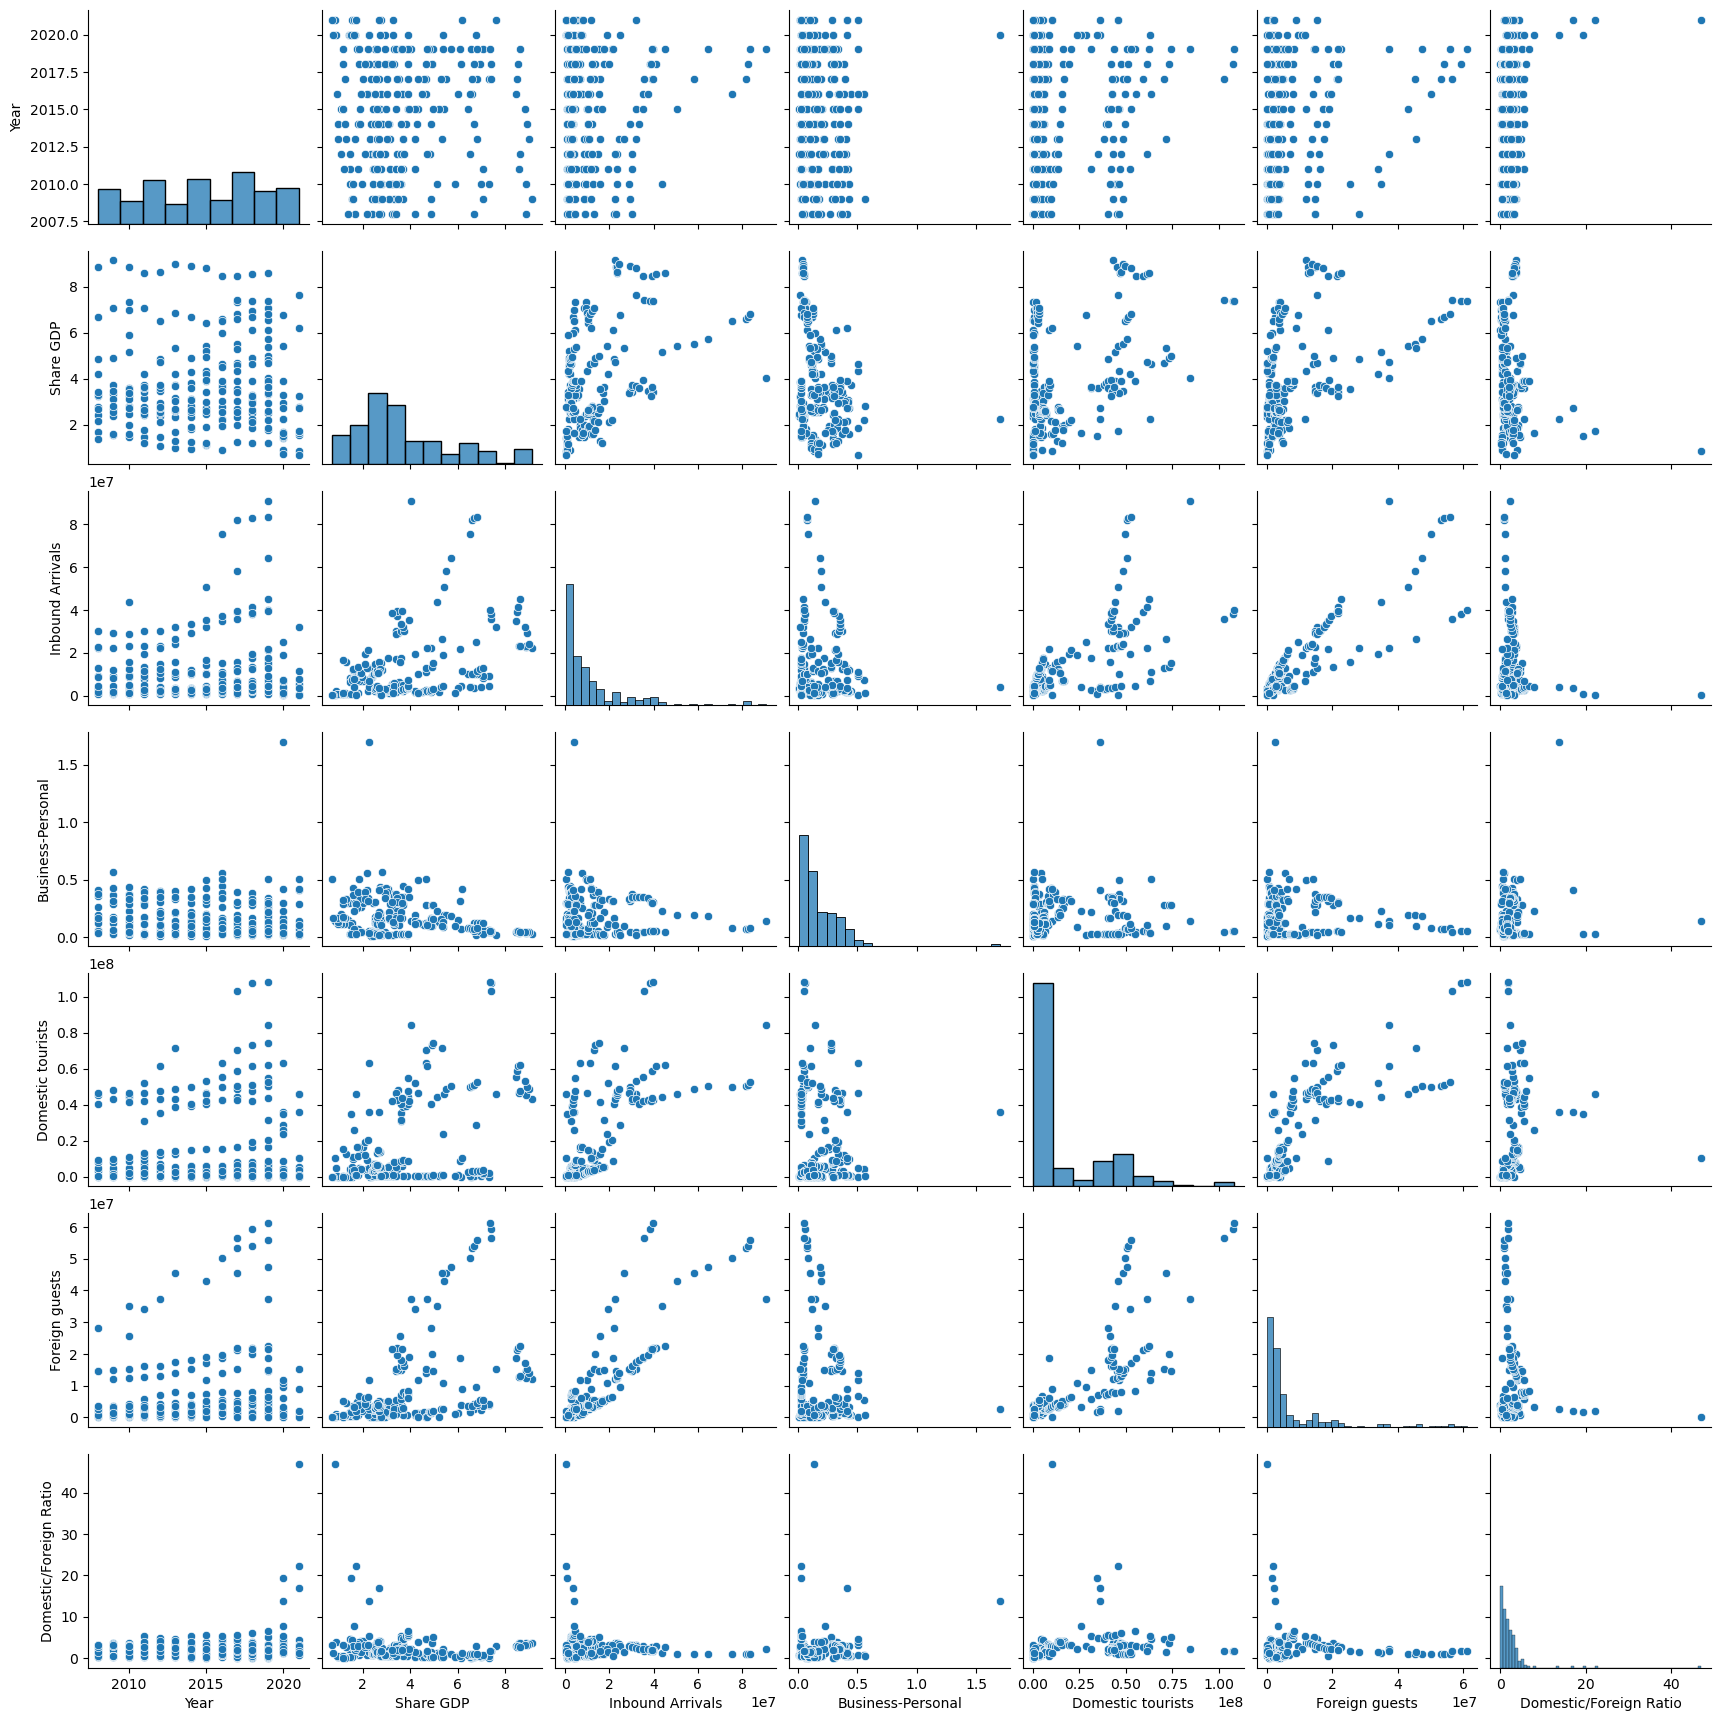

In [41]:
# sns pairplot for merged_tourismLF
plt.figure(figsize=(8, 6))
sns.pairplot(merged_tourismLF)
plt.show()

<Figure size 800x600 with 0 Axes>

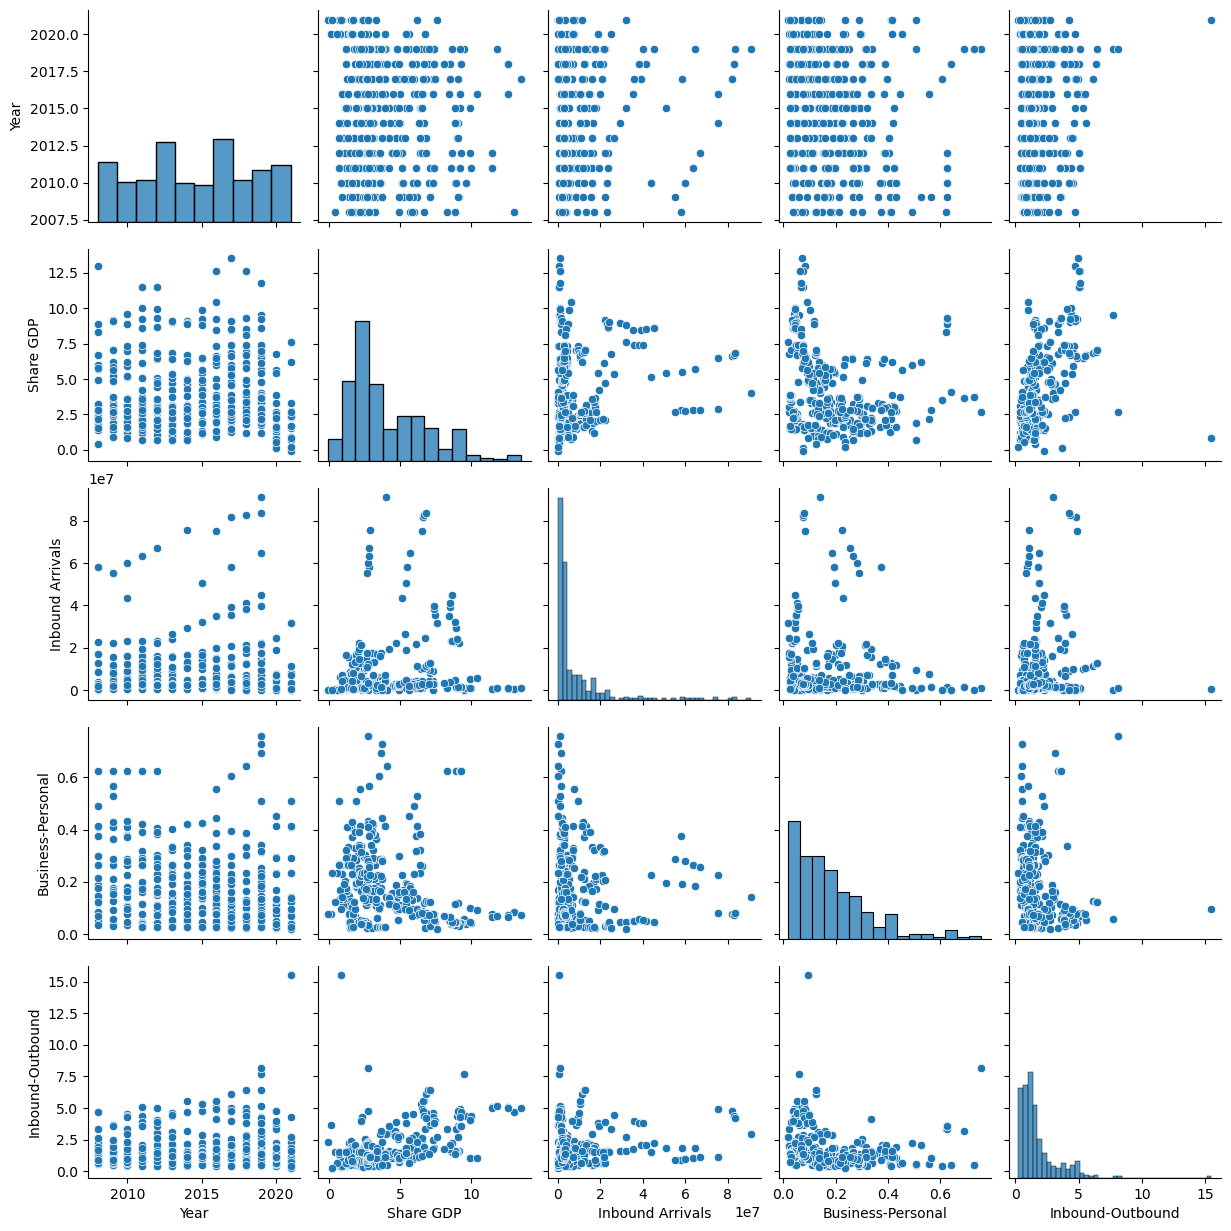

In [42]:
# sns pairplot for merged_tourismIO
plt.figure(figsize=(8, 6))
sns.pairplot(merged_tourismIO)
plt.show()

Looking at the pair plots, it is evident that several variables exhibit strong nonlinear relationships, such as inbound arrivals and share of GDP, while others display seasonal trends or clustering over time. The histograms indicate that many variables are skewed rather than normally distributed. Outliers are present, and high variance in some variables may impact model performance. Moving forward, the next steps involve utilizing k-means clustering and hierarchical clustering to analyze these trends within the dataset related to tourism.

# **Pre-processing the Data**

In this project, the OSEMN pipeline will be followed, similar to what was outlined in previous data pre-processing projects. The OSEMN methodology consists of five key steps: obtaining the data, scrubbing and cleaning it, exploring and visualizing it to identify patterns and trends, modeling the data to achieve predictive power, and finally interpreting the results. This systematic approach ensures that the data is well-prepared for analysis, allowing for the derivation of meaningful insights.

All nulls for the three datasets been dropped prior to the conduction of this project.

## **Conducting PCA on Datasets**

Applying PCA reduces the dataset's dimensions while preserving variance. Instead of clustering the raw data, K-Means is applied to the principal components, which reduces noise and enhances clustering efficiency.

#### 'Merged_tourism' Dataset:

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select relevant columns
columns_for_pca = ["Share GDP", "Inbound Arrivals", "Business-Personal"]
pca_data = merged_tourism[columns_for_pca]

# Standardize data (mean=0, variance=1)
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Apply PCA (reduce to 2 components)
pca = PCA(n_components=2, random_state=7)
pca_result = pca.fit_transform(pca_data_scaled)

# Convert PCA output to DataFrame
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Country"] = merged_tourism["Entity"]
pca_df["Year"] = merged_tourism["Year"]

pca_df.head()

PC1       PC2  Country  Year
0  0.058264 -0.259164  Albania  2008
1 -0.004448 -0.220394  Albania  2009
2 -0.059789 -0.201702  Albania  2010
3 -0.032198 -0.153167  Albania  2011
4 -0.026778 -0.084953  Albania  2012

#### 'Merged_tourismLF' Dataset:

In [52]:
# Select relevant columns for merged_tourismLF
columns_for_pca_mergedtourismLF = ["Share GDP", "Domestic tourists", "Foreign guests"]
pca_mergedtourismLF = merged_tourismLF[columns_for_pca_mergedtourismLF]

# Standardize data (mean=0, variance=1)
scaler_LF = StandardScaler()
pca_mergedtourismLF_scaled = scaler_LF.fit_transform(pca_data)

# Apply PCA (reduce to 2 components)
pca_LF = PCA(n_components=2, random_state=7)
pca_LF_result = pca_LF.fit_transform(pca_data_scaled)

# Convert PCA output to DataFrame
LF = pd.DataFrame(pca_LF_result, columns=["PC1_LF", "PC2_LF"])
LF["Country"] = merged_tourismLF["Entity"]
LF["Year"] = merged_tourismLF["Year"]

LF.head()

PC1_LF    PC2_LF  Country    Year
0  0.058264 -0.259164  Albania  2008.0
1 -0.004448 -0.220394  Albania  2009.0
2 -0.059789 -0.201702  Albania  2010.0
3 -0.032198 -0.153167  Albania  2011.0
4 -0.026778 -0.084953  Albania  2012.0

**Merged_tourismLF** will be dropped because it has similar data outputs to **merged_tourism**. The focus will now be on **merged_tourism** and **merged_tourismIO**.

#### 'Merged_tourismIO' Dataset:

In [55]:
# Select relevant columns for merged_tourismIO
columns_for_pca_mergedtourismIO = ["Share GDP", "Inbound-Outbound"]
columns_for_pca_mergedtourismIO = merged_tourismIO[columns_for_pca_mergedtourismIO]

# Standardize data (means=0, variance=1)
scaler_IO = StandardScaler()
pca_mergedtourismIO_scaled = scaler_IO.fit_transform(columns_for_pca_mergedtourismIO)

# Apply PCA
pca_IO = PCA(n_components=2, random_state=7)
pca_IO_result = pca_IO.fit_transform(pca_mergedtourismIO_scaled)

# Convert PCA output to DataFrame
IO = pd.DataFrame(pca_IO_result, columns=["PC1_IO", "PC2_IO"])
IO["Country"] = merged_tourismIO["Entity"]
IO["Year"] = merged_tourismIO["Year"]

IO.head()

PC1_IO    PC2_IO    Country  Year
0 -1.078903  0.054046  Argentina  2016
1 -1.102097 -0.005412  Argentina  2017
2 -1.106968  0.067163  Argentina  2018
3 -1.038760  0.170539  Argentina  2019
4 -1.308802  0.371101  Argentina  2020

## **PCA Projection of the Datasets**

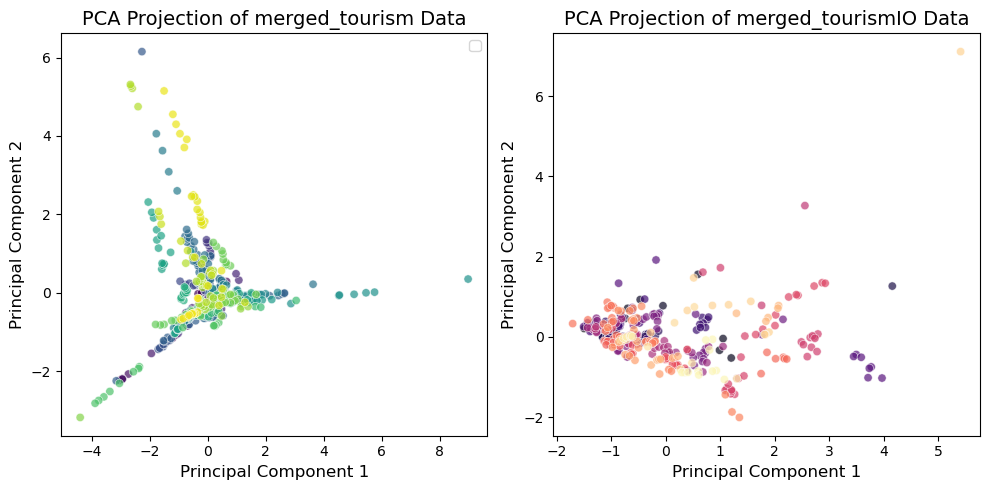

In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# PCA projection plot for merged_tourism (Plot 1)
sns.scatterplot(x="PC1", y="PC2", hue="Country", data=pca_df, palette="viridis", alpha=0.7, ax=axs[0])
axs[0].set_xlabel("Principal Component 1", fontsize=12)
axs[0].set_ylabel("Principal Component 2", fontsize=12)
axs[0].set_title("PCA Projection of merged_tourism Data", fontsize=14)
axs[0].legend([], [])  # Hide long legend

# PCA projection plot for merged_tourismIO (Plot 2)
sns.scatterplot(x="PC1_IO", y="PC2_IO", hue="Country", data=IO, palette="magma", alpha=0.7, ax=axs[1])  # Changed ax to axs[1]
axs[1].set_xlabel("Principal Component 1", fontsize=12)
axs[1].set_ylabel("Principal Component 2", fontsize=12)
axs[1].set_title("PCA Projection of merged_tourismIO Data", fontsize=14)
axs[1].legend([], [], frameon=False)  # Hide long legend

# Adjust layout and spacing
plt.tight_layout()

# Display the figure
plt.show()

The scatter plot illustrates the results of a Principal Component Analysis (PCA) of tourism data from various countries. PCA simplifies the data by condensing multiple tourism features into two main components, PC1 and PC2, plotted on the x and y axes, respectively. Each country's position represents its unique tourism characteristics, with clusters indicating similar patterns. PC1 captures the most significant variation in the data, while PC2 captures the second most significant. Analyzing the scatter plot allows us to identify clusters of countries with similar tourism profiles, providing valuable insights for decision-making in the tourism sector.  

**'Merged_tourism' Dataset**

The legend was hidden because it was long. This analysis will focus on the countries listed above for merged tourism to identify key points and which countries will be studied. The data shows a balanced mix of different types of tourism, including domestic and international, as well as business and personal travel. Many European countries, some Asian economies, and developing nations have stable tourism sectors that contribute moderately to their GDP. The data also highlights countries that rely heavily on tourism, such as the Maldives, Seychelles, and Aruba, where international tourism greatly affects their economies. This group may also include small island nations. Upper outliers may include countries with unusual tourism trends. These could be nations with high outbound tourism spending, like China and Germany, or countries that saw a sudden change in tourism after COVID-19. Some countries may have low tourism impact on their GDP, such as those rich in natural resources or with limited tourism services due to conflicts. Moreover, k-means clustering for further analysis.

**'Merged_tourismIO' Dataset**

Many countries show similar trends in tourism. This means they have similar patterns in both incoming and outgoing travel. A lot of countries fall along a central area, called PC1. This area represents the overall level of tourism activities, like the volume or value of inbound and outbound travel for business and personal reasons. Countries such as Belgium, Canada, India, Italy, and France are in this central zone. They likely have steady inbound tourism and significant outbound travel, without depending too much on one over the other. On the right side, countries like the United Arab Emirates, Uruguay, Israel, and Singapore stand out. They show higher levels of tourism, often due to strong business travel or a heavy reliance on international visitors.  Nepal and Jordan are slightly above the center, suggesting they may have more personal travel. In contrast, Mauritius and Panama are lower, indicating different patterns in their tourism flows. Nonetheless, most countries have similar tourism patterns, but a few have distinct profiles that deserve closer examination using k-means clustering.


# **Modeling (Clustering)**

## **K-Means Clustering**

The model selected for the project is k-means clustering, which will be used to identify patterns among countries based on tourism-related indicators. K-means is chosen for its speed and simplicity, making it ideal for large datasets. It will help summarize patterns across different country groups effectively. Agglomerative clustering was also considered but k-means was opted for due to its efficiency and clear output, especially after reducing dimensions with PCA (Principal Component Analysis). However, it is important to note that k-means are sensitive to the initial number of clusters (K) and may struggle with irregularly shaped or varying-density clusters. Additionally, it is not suitable for data with outliers or significant noise.

### *Elbow Method to Determine Most Optimal K*

#### 'Merged_tourism' Dataset

In [64]:
from sklearn.cluster import KMeans

# Elbow method for merged_tourism
X = pca_df[["PC1", "PC2"]]

# Try different k-values
clusters = [] # Initialize clusters as an empty list
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    # Fit kmeans to the PCA data (X)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_) # Append only inertia values to clusters

#### 'Merged_tourismIO' Dataset

In [66]:
# Elbow method for merged_tourismIO
X_IO = IO[["PC1_IO", "PC2_IO"]]

# Try different k-values
clusters_IO = []  # Initialize clusters_IO as an empty list
K_range_IO = range(1, 11)
for k in K_range_IO:
    kmeans_IO = KMeans(n_clusters=k, random_state=42, n_init=10)
    # Fit kmeans to the PCA data (X)
    kmeans_IO.fit(X_IO) # Make sure to fit on X_IO, not X
    clusters_IO.append(kmeans_IO.inertia_)  # Append only inertia values to clusters_IO

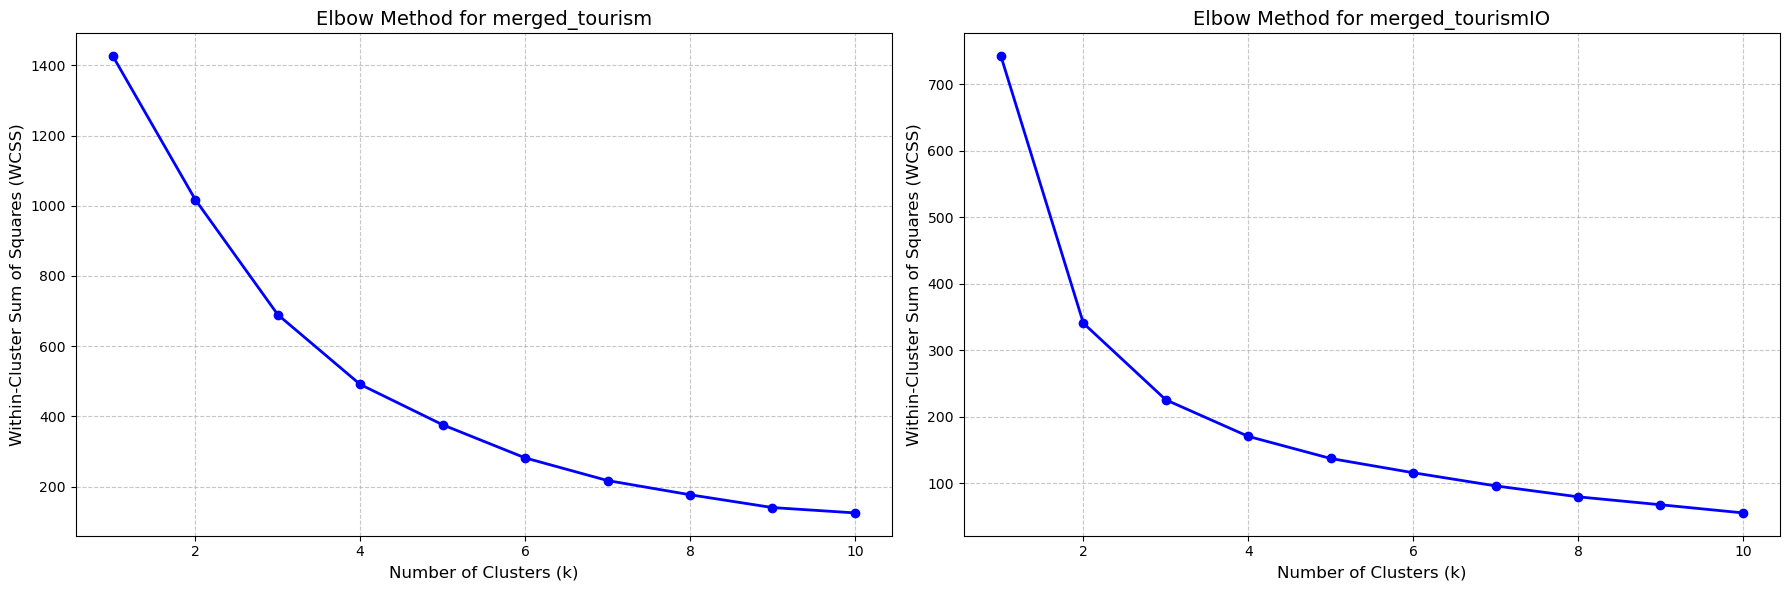

In [67]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # Adjust figsize as needed

# Elbow method for merged_tourism (Plot 1)
axs[0].plot(K_range, clusters, marker='o', linestyle='-', color='b', linewidth=2)
axs[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axs[0].set_ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
axs[0].set_title('Elbow Method for merged_tourism', fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.7)

# Elbow method for merged_tourismIO (Plot 2)
axs[1].plot(K_range_IO, clusters_IO, marker='o', linestyle='-', color='b', linewidth=2)
axs[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axs[1].set_ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
axs[1].set_title('Elbow Method for merged_tourismIO', fontsize=14)
axs[1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout and spacing
plt.tight_layout()

# Display the figure
plt.show()

The most optimal value of K for **merged_tourism** is between 3 and 4, as this range indicates the sharpest bend in the graph. This elbow suggests that 3 or 4 clusters offer the best balance between compactness and simplicity. Similarly, for **merged_tourismIO**, the sharpest bend occurs between 2 and 4, which aligns with the findings for **merged_tourism**. Additionally, another method to determine the most optimal K is the 'Silhouette Score.'

### *Silhouette Score Method to Determine Most Optimal K*

#### 'Merged_tourism' Dataset

In [71]:
from sklearn.metrics import silhouette_score

X = pca_df[["PC1", "PC2"]]

# Try different k-values
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k={k}, the silhouette score is {silhouette_avg:.3f}")

optimal_k = k_values[np.argmax(silhouette_scores)]

For k=2, the silhouette score is 0.567
For k=3, the silhouette score is 0.488
For k=4, the silhouette score is 0.541
For k=5, the silhouette score is 0.517
For k=6, the silhouette score is 0.404
For k=7, the silhouette score is 0.428
For k=8, the silhouette score is 0.461
For k=9, the silhouette score is 0.456
For k=10, the silhouette score is 0.463


#### 'Merged_tourismIO' Dataset

In [73]:
X_IO = IO[["PC1_IO", "PC2_IO"]]

# Try different k-values
k_values_IO = range(2, 11)
silhouette_scores_IO = []

for k in k_values_IO:
    kmeans_IO = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_IO.fit(X_IO) # Changed from X to X_IO
    labels_IO = kmeans_IO.labels_ # Changed from labels to labels_
    silhouette_avg_IO = silhouette_score(X_IO, labels_IO)
    silhouette_scores_IO.append(silhouette_avg_IO)
    print(f"For k={k}, the silhouette score is {silhouette_avg_IO:.3f}")

optimal_k_IO = k_values_IO[np.argmax(silhouette_scores_IO)]

For k=2, the silhouette score is 0.572
For k=3, the silhouette score is 0.522
For k=4, the silhouette score is 0.526
For k=5, the silhouette score is 0.502
For k=6, the silhouette score is 0.380
For k=7, the silhouette score is 0.482
For k=8, the silhouette score is 0.384
For k=9, the silhouette score is 0.390
For k=10, the silhouette score is 0.421


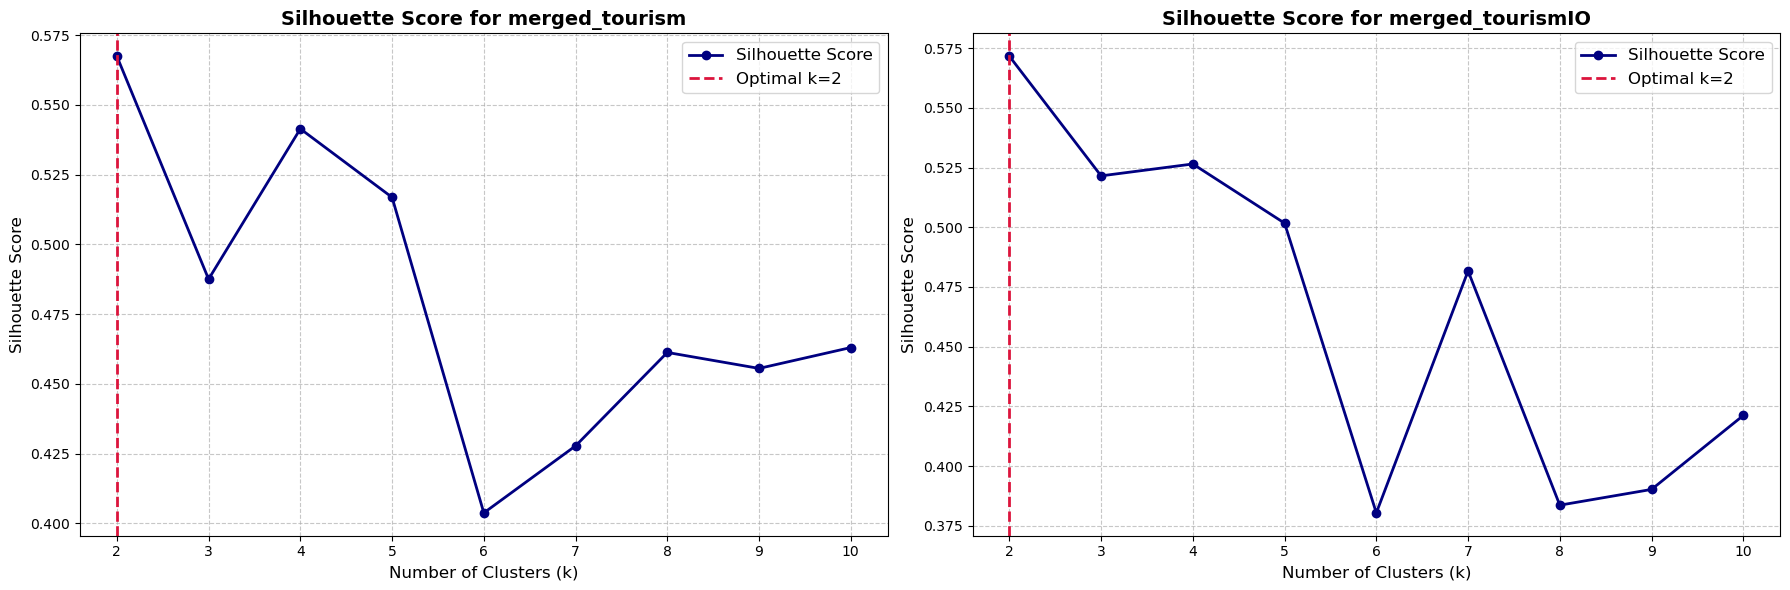

In [74]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # Adjust figsize as needed to accommodate 2 plots

# Plot silhouette score on the first subplot (axs[0])
axs[0].plot(k_values, silhouette_scores, marker='o', linestyle='-', color='navy', linewidth=2, label="Silhouette Score")
axs[0].axvline(optimal_k, color='crimson', linestyle='--', linewidth=2, label=f'Optimal k={optimal_k}')
axs[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axs[0].set_ylabel('Silhouette Score', fontsize=12)
axs[0].set_title('Silhouette Score for merged_tourism', fontsize=14, fontweight='bold')
axs[0].legend(fontsize=12)
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].set_xticks(k_values)
axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)

# Plot for silhouette score for merged_tourismIO
axs[1].plot(k_values_IO, silhouette_scores_IO, marker='o', linestyle='-', color='navy', linewidth=2, label="Silhouette Score")
axs[1].axvline(optimal_k_IO, color='crimson', linestyle='--', linewidth=2, label=f'Optimal k={optimal_k_IO}')
axs[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axs[1].set_ylabel('Silhouette Score', fontsize=12)
axs[1].set_title('Silhouette Score for merged_tourismIO', fontsize=14, fontweight='bold')
axs[1].legend(fontsize=12)
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].set_xticks(k_values_IO)
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()  # Display the figure with all subplots

The best score looking at **merged_tourism** is achieved with k = 2, yielding a score of 0.567. However, k = 4, which has a score of 0.541, is also notable due to its performance. Although k = 2 has the highest score, k = 4 is considered the optimal choice because it performs well in both the Silhouette score and the Elbow method.

The best score for **merged_tourismIO** is achieved with k = 2, resulting in a score of 0.572. However, k = 4, with a score of 0.526, is also noteworthy due to its strong performance. While k = 2 has the highest score overall, k = 4 is the better choice because similar to **merged_tourism**, it performs well in both the Silhouette score and the Elbow method.

### *Conducting K-means Clustering*

#### 'Merged_tourism' Dataset

In [78]:
# Optimal K for merged_tourism
k_optimal = 4

# Fit K-Means
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
pca_df["Cluster"] = kmeans.fit_predict(X)

#### 'Merged_tourismIO' Dataset

In [80]:
# Optimial K for merged_tourismIO
k_optimal_IO = 4

# Fit K-Means
kmeans_IO = KMeans(n_clusters=k_optimal_IO, random_state=42, n_init=10)
IO["Cluster"] = kmeans_IO.fit_predict(X_IO)

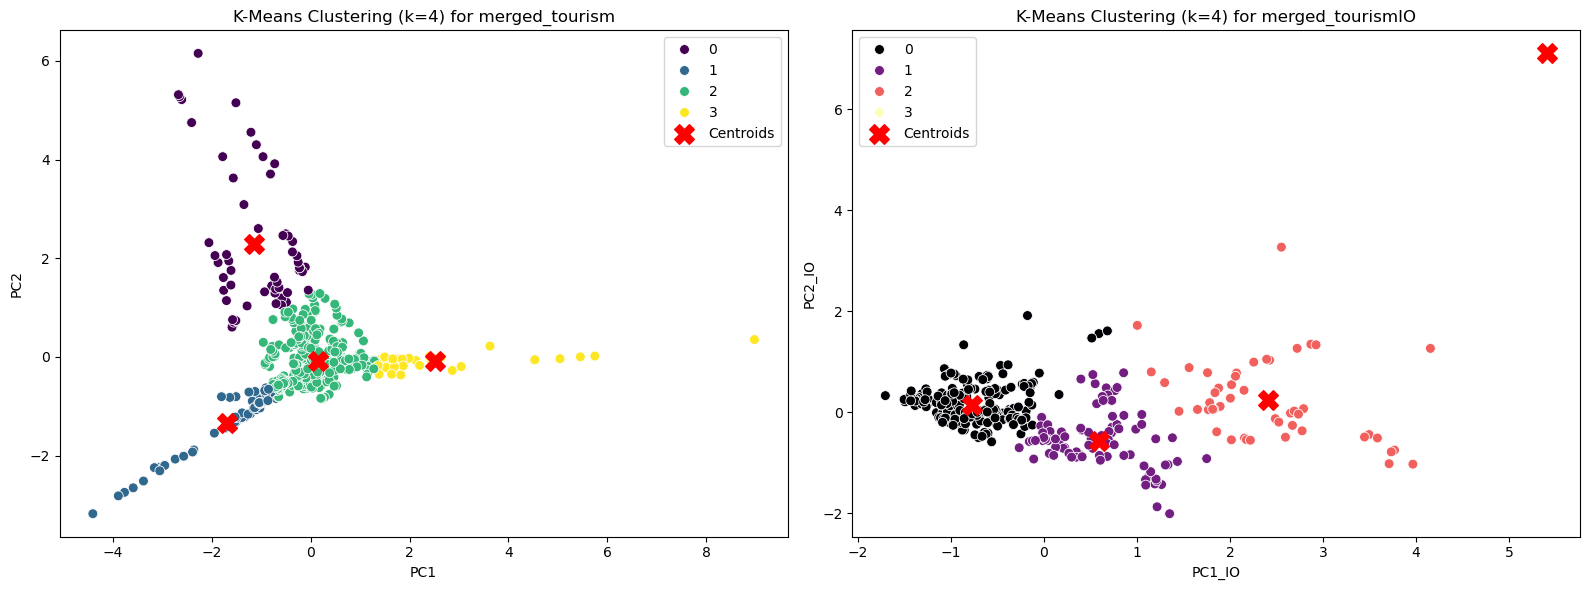

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # Adjust figsize as needed

# Scatter plot of clusters for merged_tourism (Plot 1)
# Before plotting, ensure the 'Cluster' column is in pca_df
pca_df["Cluster"] = kmeans.labels_  # Add this line to assign cluster labels
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=pca_df, palette="viridis", s=50, ax=axs[0])
axs[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroids")
axs[0].legend()
axs[0].set_title(f"K-Means Clustering (k={k_optimal}) for merged_tourism")

# Scatter plot of clusters for merged_tourismIO (Plot 2)
sns.scatterplot(x="PC1_IO", y="PC2_IO", hue="Cluster", data=IO, palette="magma", s=50, ax=axs[1])
axs[1].scatter(kmeans_IO.cluster_centers_[:, 0], kmeans_IO.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroids")
axs[1].legend()
axs[1].set_title(f"K-Means Clustering (k={k_optimal_IO}) for merged_tourismIO")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## **Hierarchical Clustering**

Hierarchical clustering is useful for finding natural groupings in data without needing to pre-set the number of clusters. It builds a tree-like structure (dendrogram) that shows how data points are related, making it easier to visualize similarities and differences—especially helpful for tourism data across countries.

#### 'Merged_tourism' Dataset

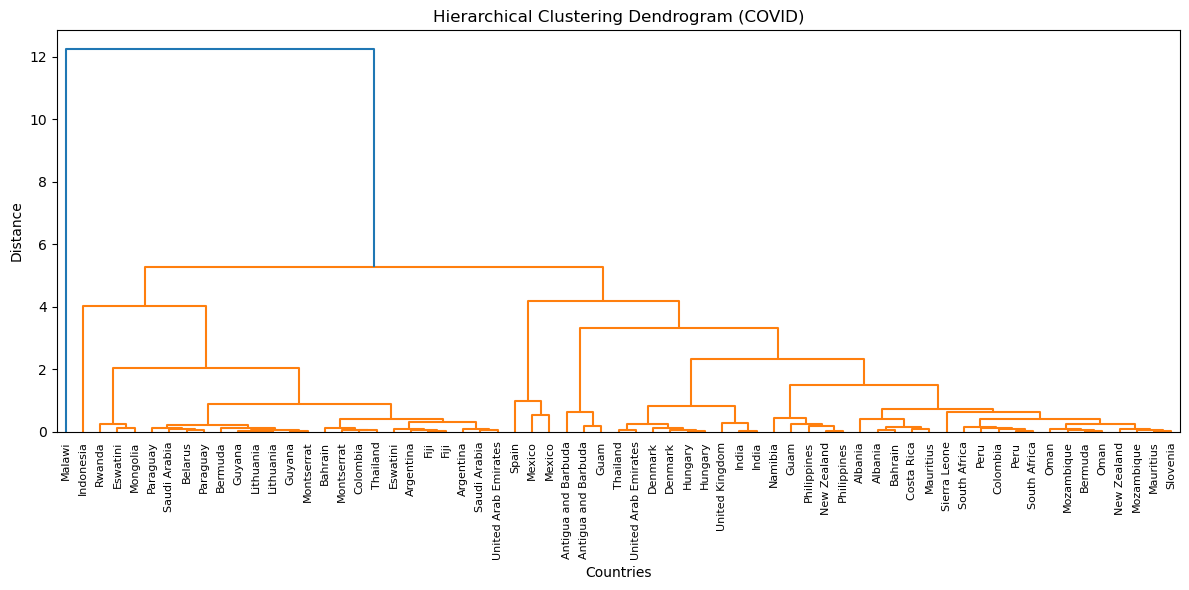

In [84]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


# Filter data for COVID-19 years (2020-2021)
covid_years_df = pca_df[pca_df['Year'].isin([2020, 2021])]

# Agglomerative Clustering for COVID data
linkage_matrix_covid = linkage(covid_years_df[['PC1', 'PC2']], method='ward') 

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix_covid, labels=covid_years_df['Country'].tolist(), orientation='top', leaf_font_size=8) 
plt.title('Hierarchical Clustering Dendrogram (COVID)')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

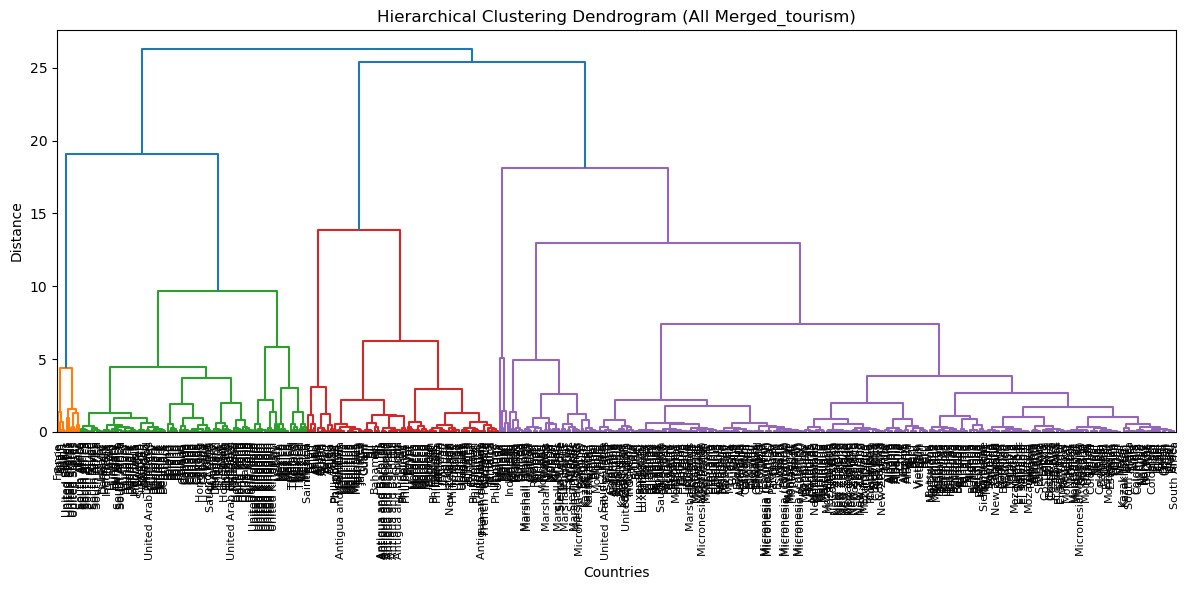

In [85]:
# Dendogram All Merged_tourism 

linkage_matrix = linkage(pca_df[['PC1', 'PC2']], method='ward')

plt.figure(figsize=(12, 6))

dendrogram(linkage_matrix, labels=pca_df['Country'].tolist(), orientation='top', leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram (All Merged_tourism)')
plt.xlabel('Countries')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

#### 'Merged_tourismIO' Dataset

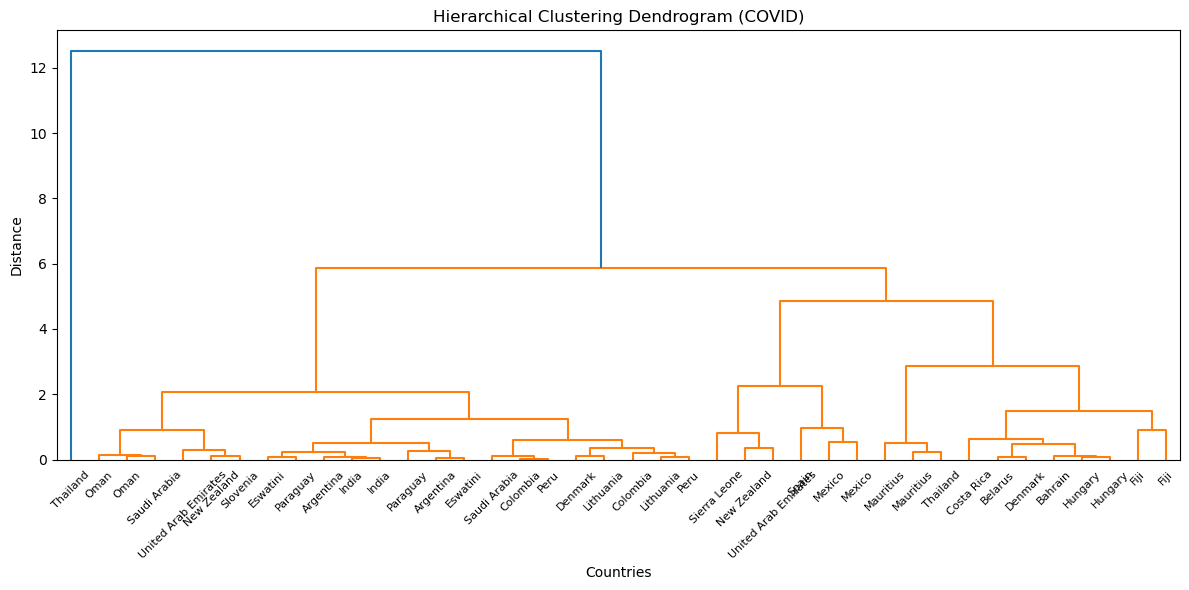

In [87]:
# Agglomerative Clustering for merged_tourismIO

# Filter data for COVID-19 years (2020-2021)
covid_years_df = IO[IO['Year'].isin([2020, 2021])]

# Agglomerative Clustering for COVID data
linkage_matrix_covid = linkage(covid_years_df[['PC1_IO', 'PC2_IO']], method='ward') 

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix_covid, labels=covid_years_df['Country'].tolist(), orientation='top', leaf_font_size=8) 
plt.title('Hierarchical Clustering Dendrogram (COVID)')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

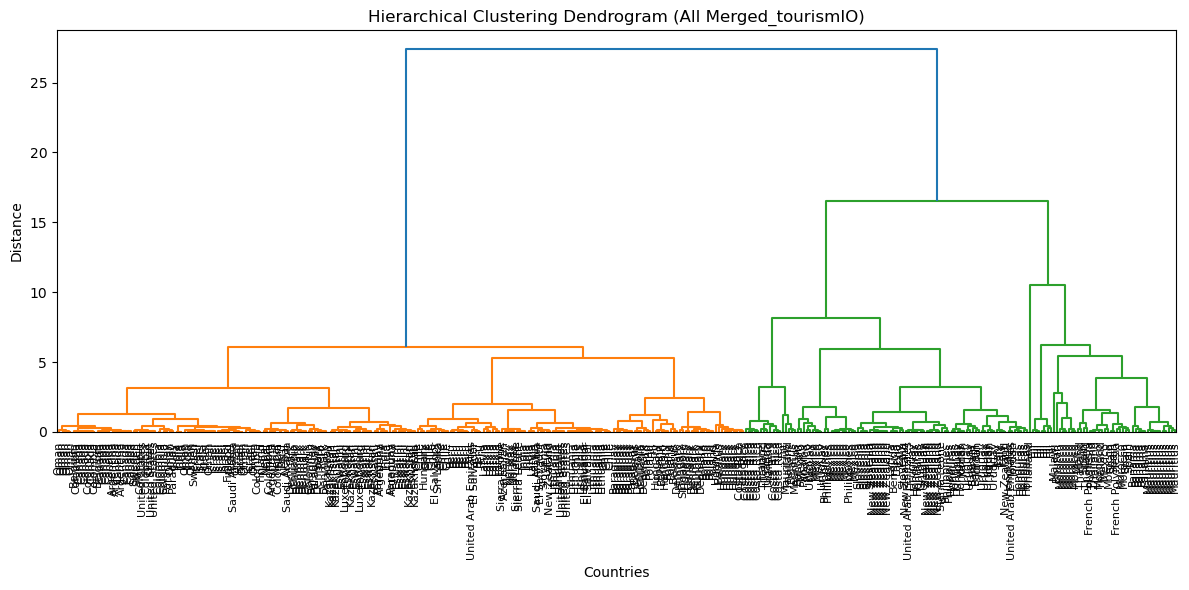

In [88]:
# Dendogram All Merged_tourismIO

linkage_matrix = linkage(IO[['PC1_IO', 'PC2_IO']], method='ward')

plt.figure(figsize=(12, 6))

dendrogram(linkage_matrix, labels=IO['Country'].tolist(), orientation='top', leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram (All Merged_tourismIO)')
plt.xlabel('Countries')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

# **Storytelling (Clustering Analysis)**

Analyzing the output reveals various insights regarding the examined datasets. In the merged tourism dataset, we can identify four distinct clusters. The yellow cluster represents a sparse outlier group that likely consists of high GDP countries with extreme tourism values. The densest cluster, shown in green, likely represents countries with moderate tourism dependency. This clustering helps us address important research questions, such as, “What clusters emerge among countries with similar levels of tourism-related GDP dependency?” The visual representation of the clusters indicates varying degrees of dependency, with low dependency classified as dark blue, moderate as green, slight as purple, and extreme outliers as yellow. 

In examining the "inbound vs. outbound tourism" dataset, we see that Cluster 0 (black) is the most compact, indicating that these countries may maintain balanced inbound and outbound flows with low variation. In contrast, Cluster 3 (yellow) contains some large outliers, suggesting that these countries represent small tourism economies with extreme behaviors during COVID-19. This information is relevant to our analysis of the question, “How do countries group based on the balance of inbound vs. outbound tourism?” The separation observed here reflects clear structural differences between the groups. 

When exploring the hierarchical clustering dendrogram focused on COVID-19, we observe that some country clusters are tightly grouped, resembling small island nations, while countries like Malawi and Indonesia stand out as unique, likely due to the specific impacts of the pandemic on tourism. This relates to our question, “How did the pandemic impact tourism-related GDP clusters?” The dendrogram illustrates which countries exhibited similar responses during 2020-2021. A significant jump in linkage distance near the top indicates a few very distinct outliers. In the context of the inbound and outbound dataset, Thailand and Oman are notable examples.

Lastly, we aim to answer the question, “How do clusters from 2008–2019 compare to those from 2020–2021?” The two dendrograms presented represent hierarchical clustering analyses of tourism data from 2008 to 2021.  The first dendrogram, labeled "All Merged_tourism," groups countries based on a variety of tourism indicators, including domestic and international tourism expenditure, the contribution of tourism to GDP, and the balance between personal and business travel. Countries are clustered together according to their overall similarity across these variables. The height of the branches indicates the level of dissimilarity; taller branches signify more distinct clusters. This dendrogram reveals several clear groupings, such as small island nations that heavily rely on tourism and large, diversified economies with more balanced tourism profiles.

The second dendrogram, "All Merged_tourismIO," focuses specifically on inbound and outbound tourism indicators. It illustrates how countries compare in terms of the number of tourists they receive versus those they send abroad, along with the associated economic impacts. The resulting clusters are simpler and more focused, grouping countries based on their net tourism flow behavior. For example, countries with high levels of inbound tourism cluster together, while those that are more outbound-oriented form distinct groups. Together, these dendrograms provide valuable insights into how countries compare in terms of tourism-related economic activity throughout the 2008–2021 period. The first dendrogram offers a comprehensive view, considering the broader structure of tourism economies, while the second emphasizes the movements of tourists across borders. By comparing these clusters from before (2008–2019) and during the COVID-19 pandemic (2020–2021), we can gain insights into how global tourism patterns were disrupted and whether countries shifted between clusters as a result of the pandemic's economic impact.

# **Impact Section**

The research on tourism's impact on GDP has potential benefits, such as helping policymakers understand how different types of tourism might affect economic growth, identifying which countries are more resilient to economic shocks, and utilizing historical data to guide post-pandemic recovery strategies. However, there are drawbacks to consider. For example, there is a risk of ignoring social and environmental factors, as the data doesn’t necessarily capture all countries or account for regional disparities. Additionally, there is a broader economic context beyond tourism that must be acknowledged. However, since I couldn’t find any datasets related to the workforce, it is important to acknowledge that employment and types of work can influence tourism.

# **References**

Chugani, V. (2024, July 17). What is Manhattan distance? A deep dive. DataCamp. https://www.datacamp.com/tutorial/manhattan-distance 

Clustering algorithm. Clustering Algorithm - an overview | ScienceDirect Topics. (n.d.). https://www.sciencedirect.com/topics/engineering/clustering-algorithm 

Clustering in machine learning. GeeksforGeeks. (2025, January 27). https://www.geeksforgeeks.org/clustering-in-machine-learning/ 

GeeksforGeeks. (2025, February 4). Difference between agglomerative clustering and divisive clustering. GeeksforGeeks. https://www.geeksforgeeks.org/difference-between-agglomerative-clustering-and-divisive-clustering/ 

Encyclopædia Britannica, inc. (2025, April 1). Tourism. Encyclopædia Britannica. https://www.britannica.com/topic/tourism 

K means clustering - introduction. GeeksforGeeks. (2025a, January 15). https://www.geeksforgeeks.org/k-means-clustering-introduction/ 

Truyols, M. (2025, April 1). The economic impact of tourism: What you need to know. Mize. https://mize.tech/blog/the-economic-impact-of-tourism-what-you-need-to-know/#:~:text=Tourism%20increases%20economic%20activity.,accommodation%2C%20transport%2C%20and%20attractions. 

Truyols, M. (2025, March 18). Countries with the biggest tourism industry. Mize. https://mize.tech/blog/the-10-countries-with-the-biggest-tourism-industry/ 

Çenet, R. (2024, March 1). Visiting the Most Crowded Island on Earth (I can’t forget what I saw). YouTube. https://www.youtube.com/watch?v=LgQxzYQP4as&t=2s 

# **Code**

This notebook showcases the implemented code.